<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/%5BESPEC%5D%20Fundamentos%20Aprendizagem%20M%C3%A1quina/T%C3%B3pico%2002%20-%20Aprendizado-Supervisionado%20-%20KNN/T%C3%B3pico_02_Aprendizado_Supervisionado_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial KNN

Neste tutorial, iniciaremos nossas práticas de aprendizado de máquina utilizando a biblioteca scikit-learn, que é uma das principais ferramentas de aprendizado de máquina em Python.

Dentre os algoritmos de classificação disponíveis nesta biblioteca, vamos começar com o KNN, que significa "K-Nearest Neighbors" ou "K-Vizinhos Mais Próximos". Esse algoritmo é um dos mais simples e populares da área de aprendizado de máquina.

O KNN é um método não-paramétrico de classificação, ou seja, ele não assume nada sobre a distribuição dos dados. O funcionamento do algoritmo se baseia na ideia de que amostras semelhantes tendem a estar próximas umas das outras no espaço de atributos.

Dado um conjunto de dados de treinamento com amostras já classificadas, o KNN determina a classe de uma amostra de teste a partir dos K vizinhos mais próximos a ela no espaço de atributos. A classe da amostra de teste é determinada por voto majoritário entre as classes dos seus K vizinhos mais próximos.

Abaixo ilustra-se o KNN:

> > > > > 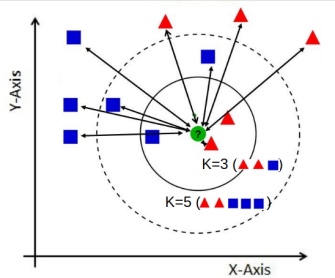

#Dataset sintético

  Utilizamos a função make_blobs() para criar uma distribuição de dados que será usada para avaliar o desempenho do KNN. Essa função permite criar conjuntos de dados artificiais com uma determinada quantidade de centroídes e diferentes desvios-padrão.

No entanto, mais adiante no tutorial, produziremos distribuições de dados mais complexas, que permitirão avaliar o desempenho do KNN em situações mais desafiadoras. Dessa forma, poderemos entender melhor as limitações e os pontos fortes do algoritmo, bem como explorar diferentes técnicas para melhorar sua eficiência.

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

random_seed=9999

#centro de massa da distribuição
centers = [[1, 2], [7, 5], [3, 12]]
n_classes = len(centers)

#criação da distribuição (300 instâncias 2 features)
data, labels = make_blobs(n_samples=300, n_features=2,
                          centers=np.array(centers),
                          random_state=random_seed)

for sample, label in zip(data[:10],labels[:10]):
  print(sample, label)


[1.88251299 0.21776835] 0
[-0.14158407  0.56091061] 0
[8.23809819 5.45613494] 1
[ 2.38615696 12.5106381 ] 2
[ 3.37055279 12.60774395] 2
[ 3.17995786 11.41664478] 2
[ 4.38621013 12.4870083 ] 2
[-0.19880191  4.93170517] 0
[1.11984837 2.18259889] 0
[7.23151031 4.51579089] 1


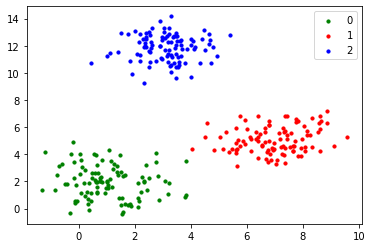

In [ ]:
#Exibição
colours = ('green', 'red', 'blue')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1],
               c=colours[n_class], s=10, label=str(n_class))



ax.legend(loc='upper right');

#Preparação dos dados

Uma etapa crucial no aprendizado de máquina é a preparação dos dados. Esta etapa inclui normalmente:


*   Análise Exploratória
*   Normalização
*   Método de Validação





##Holdout (Train-Val | Test)

In [ ]:
#70% treino - 30% test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

#Porção do treinamento fica para validação (70-30)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)



Avaliação Geral

In [ ]:
centers = [[1, 2], [7, 5], [3, 12]]
n_classes = len(centers)

#criação da distribuição (300 instâncias 2 features)
data, labels = make_blobs(n_samples=300, n_features=2,
                          centers=np.array(centers),
                          random_state=random_seed)

#Criação do modelo com seus hiper-parâmetros


*   Distância
*   K-Vizinhos




In [ ]:
from sklearn.neighbors import KNeighborsClassifier


#p=1 ~ Manhattan Distance
#p=2 ~ Euclidean
#p!=1|2 ~ minkowski
knn = KNeighborsClassifier(metric='minkowski',
                           p=2,
                           n_neighbors=5)


knn.fit(train_data,train_labels)


KNeighborsClassifier()

#Teste do modelo

In [ ]:
#computa as classes para todos
predicts = knn.predict(test_data)

from sklearn.metrics import accuracy_score
acc = accuracy_score(test_labels,predicts)
print(acc)

1.0


###Metricas de Avaliação
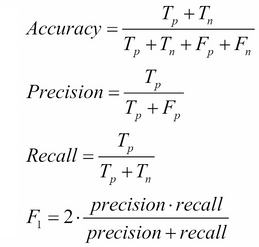

In [ ]:
from sklearn.metrics import accuracy_score
example_predictions = [0, 2, 1, 3, 2, 0, 1, 2, 0]
example_labels      = [0, 2, 2, 3, 2, 1, 1, 1, 1]
acc = accuracy_score(example_labels,example_predictions)
print(f'Acc: {acc}')

Acc: 0.5555555555555556


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(example_labels,example_predictions))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.50      0.25      0.33         4
           2       0.67      0.67      0.67         3
           3       1.00      1.00      1.00         1

    accuracy                           0.56         9
   macro avg       0.62      0.73      0.62         9
weighted avg       0.59      0.56      0.54         9



#Analise Crítica
Vamos analisar o desempenho do KNN quanto:


*   Distribuição
*   K Vizinhos
*   Quantidade de amostras




(300, 2) (300,)
[1.88251299 0.21776835] 0
[-0.14158407  0.56091061] 0
[8.23809819 5.45613494] 1
[ 2.38615696 12.5106381 ] 2
[ 3.37055279 12.60774395] 2
[ 3.17995786 11.41664478] 2
[ 4.38621013 12.4870083 ] 2
[-0.19880191  4.93170517] 0
[1.11984837 2.18259889] 0
[7.23151031 4.51579089] 1


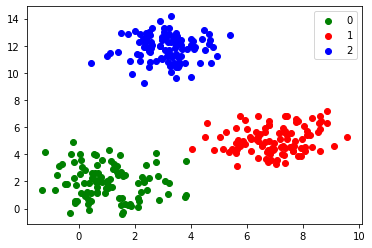


Acc: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        27

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



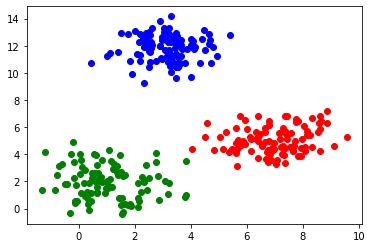

In [ ]:
#centro de massa da distribuição
centers = [[1, 2], [7, 5], [3, 12]]
n_classes = len(centers)

#criação da distribuição (300 instâncias 2 features)
data, labels = make_blobs(n_samples=300, n_features=2,
                          centers=np.array(centers),
                          random_state=random_seed)


print(data.shape, labels.shape)

for sample, label in zip(data[:10],labels[:10]):
  print(sample, label)




#Exibição

colours = ('green', 'red', 'blue','yellow',
           'purple','salmon','orange',
           'brown','greenyellow','gray')

n_classes = len(np.unique(labels))

fig, ax = plt.subplots()
for n_class in range(0, n_classes):

    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1],
               c=colours[n_class], label=str(n_class))

ax.legend(loc='upper right')

plt.show()
#70% treino - 30% test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

#Porção do treinamento fica para validação (70-30)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

knn = KNeighborsClassifier(metric='minkowski',
                           p=2,
                           n_neighbors=5)


knn.fit(train_data,train_labels)

predicts = knn.predict(test_data)

acc = accuracy_score(predicts, test_labels)
print(f'\nAcc: {acc}\n')

print(classification_report(test_labels,predicts))

fig, ax = plt.subplots()
for n_class in range(0, n_classes):

    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1],
               c=colours[n_class], label=str(n_class))


# Classificação de Bases Reais

https://scikit-learn.org/stable/datasets/toy_dataset.html

In [ ]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
import pandas as pd

df = load_wine(as_frame=True).frame

df.head()



alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [ ]:
df.sample(frac=1).head(15)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
82     12.08        1.13  2.51               24.0       78.0           2.00   
33     13.76        1.53  2.70               19.5      132.0           2.95   
129    12.04        4.30  2.38               22.0       80.0           2.10   
5      14.20        1.76  2.45               15.2      112.0           3.27   
137    12.53        5.51  2.64               25.0       96.0           1.79   
70     12.29        1.61  2.21               20.4      103.0           1.10   
117    12.42        1.61  2.19               22.5      108.0           2.00   
29     14.02        1.68  2.21               16.0       96.0           2.65   
43     13.24        3.98  2.29               17.5      103.0           2.64   
31     13.58        1.66  2.36               19.1      106.0           2.86   
133    12.70        3.55  2.36               21.5      106.0           1.70   
100    12.08        2.08  1.70               17.5       97.0           2.23   
2      13.16        2.36  2.67               18.6      101.0           2.80   
37     13.05        1.65  2.55               18.0       98.0           2.45   
118    12.77        3.43  1.98               16.0       80.0           1.63   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  \
82         1.58                  0.40             1.40             2.20   
33         2.74                  0.50             1.35             5.40   
129        1.75                  0.42             1.35             2.60   
5          3.39                  0.34             1.97             6.75   
137        0.60                  0.63             1.10             5.00   
70         1.02                  0.37             1.46             3.05   
117        2.09                  0.34             1.61             2.06   
29         2.33                  0.26             1.98             4.70   
43         2.63                  0.32             1.66             4.36   
31         3.19                  0.22             1.95             6.90   
133        1.20                  0.17             0.84             5.00   
100        2.17                  0.26             1.40             3.30   
2          3.24                  0.30             2.81             5.68   
37         2.43                  0.29             1.44             4.25   
118        1.25                  0.43             0.83             3.40   

       hue  od280/od315_of_diluted_wines  proline  target  
82   1.310                          2.72    630.0       1  
33   1.250                          3.00   1235.0       0  
129  0.790                          2.57    580.0       1  
5    1.050                          2.85   1450.0       0  
137  0.820                          1.69    515.0       2  
70   0.906                          1.82    870.0       1  
117  1.060                          2.96    345.0       1  
29   1.040                          3.59   1035.0       0  
43   0.820                          3.00    680.0       0  
31   1.090                          2.88   1515.0       0  
133  0.780                          1.29    600.0       2  
100  1.270                          2.96    710.0       1  
2    1.030                          3.17   1185.0       0  
37   1.120                          2.51   1105.0       0  
118  0.700                          2.12    372.0       1

(569, 30) (569,)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] 0


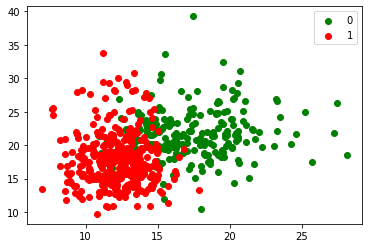

In [ ]:
#Carrego a base como vetores numpy
data,labels = load_breast_cancer(return_X_y=True)
print(data.shape, labels.shape)

print(data[0],labels[0])
#Exibição

colours = ('green', 'red', 'blue','yellow',
           'purple','salmon','orange',
           'brown','greenyellow','gray')

n_classes = len(np.unique(labels))

fig, ax = plt.subplots()
for n_class in range(0, n_classes):

    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1],
               c=colours[n_class], label=str(n_class))

ax.legend(loc='upper right')

plt.show()

In [ ]:
#70% treino - 30% test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

#Porção do treinamento fica para validação (70-30)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

knn = KNeighborsClassifier(metric='minkowski',
                           p=2,
                           n_jobs=1,
                           n_neighbors=5)


knn.fit(train_data,train_labels)

predicts = knn.predict(test_data)

acc = accuracy_score(test_labels,predicts)
print(f'\nAcc: {acc}\n')

print(classification_report(test_labels,predicts ))


Acc: 0.9415204678362573

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        53
           1       0.96      0.96      0.96       118

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

